# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [174]:
# your code here
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [175]:
dataa = pd.read_excel("Online Retail.xlsx",engine="openpyxl")

In [176]:
cleaned = dataa[(dataa.Country != "Israel")&(dataa.UnitPrice > 0)  & (dataa.CustomerID.notna()) & (~dataa.StockCode.isin(["AMAZONFEE","M","B","POST","DOT","D","CRUK","BANK CHARGES","PADS"]))]
cleaned.sort_values("UnitPrice",ascending=False)
#"""& (dataa.Quantity > 0)"""

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom
87141,C543632,22655,VINTAGE RED KITCHEN CABINET,-1,2011-02-10 16:22:00,295.00,14842.0,United Kingdom
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-25 14:19:00,295.00,13452.0,United Kingdom
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.00,14973.0,United Kingdom
...,...,...,...,...,...,...,...,...
344823,567102,16045,POPART WOODEN PENCILS ASST,500,2011-09-16 13:32:00,0.04,14124.0,United Kingdom
282095,561625,16045,POPART WOODEN PENCILS ASST,100,2011-07-28 14:03:00,0.04,16843.0,United Kingdom
525404,580619,16045,POPART WOODEN PENCILS ASST,100,2011-12-05 12:08:00,0.04,15053.0,United Kingdom
381790,569893,16045,POPART WOODEN PENCILS ASST,200,2011-10-06 15:51:00,0.04,12627.0,Germany


In [177]:
#cleaned.sort_values("Quantity",ascending=True).drop_duplicates("StockCode")
#cleaned.drop_duplicates("StockCode").sort_values("UnitPrice")

In [178]:
unique = cleaned[cleaned.Country!= "Israel"]
#unique.loc[(unique["UnitPrice"]>0) & (unique["Quantity"]>0)].sort_values("UnitPrice",ascending=False)

In [179]:
nodupe = cleaned[cleaned.Country!= "Israel"].drop_duplicates("InvoiceNo")
x = nodupe.groupby("Country").count().sort_values("StockCode",ascending=False)
x.assign(Purchases = x.InvoiceNo)["Purchases"]


Country
United Kingdom          19581
Germany                   578
France                    439
EIRE                      313
Belgium                   117
Spain                     100
Netherlands                96
Australia                  67
Switzerland                65
Portugal                   55
Italy                      49
Finland                    44
Sweden                     42
Norway                     34
Channel Islands            31
Japan                      25
Poland                     24
Denmark                    20
Austria                    19
Cyprus                     17
Malta                       9
Unspecified                 8
Iceland                     7
USA                         7
Canada                      5
Greece                      5
Singapore                   4
Czech Republic              4
European Community          4
Lithuania                   4
Bahrain                     2
Saudi Arabia                2
United Arab Emirates        2
Br

In [180]:
unique.drop_duplicates("Description").sort_values("Quantity")[:485]
items = unique.groupby(["Description"],dropna=True).count().sort_values(by="Quantity",ascending=False)
total=cleaned.sort_values(by="Quantity",ascending=False)
dataset = total[(total.UnitPrice>0) ]#&(total.Quantity>0)]
#totalpricequantity = totalprice[]
dataset.sort_values("UnitPrice",ascending=False)

#[["Description","Quantity","UnitPrice"]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.00,17406.0,United Kingdom
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.00,13145.0,United Kingdom
36165,C539438,22655,VINTAGE RED KITCHEN CABINET,-1,2010-12-17 15:11:00,295.00,16607.0,United Kingdom
...,...,...,...,...,...,...,...,...
301033,563234,16045,POPART WOODEN PENCILS ASST,100,2011-08-15 08:26:00,0.04,13621.0,United Kingdom
325477,565442,16045,POPART WOODEN PENCILS ASST,100,2011-09-04 14:09:00,0.04,12627.0,Germany
484163,577522,16045,POPART WOODEN PENCILS ASST,100,2011-11-20 13:23:00,0.04,15988.0,United Kingdom
267502,560300,16045,POPART WOODEN PENCILS ASST,100,2011-07-18 10:29:00,0.04,14911.0,EIRE


In [181]:
print("Total cost of each order\n")
averageorders = dataset.assign(ordertotal = dataset.Quantity*dataset.UnitPrice).groupby("InvoiceNo").sum(numeric_only=True)
print(averageorders["ordertotal"],"\n\nAOV is", averageorders["ordertotal"].mean())



Total cost of each order

InvoiceNo
536365        139.12
536366         22.20
536367        278.73
536368         70.05
536369         17.85
             ...    
C581470        -8.32
C581484   -168469.60
C581490       -32.53
C581568       -54.75
C581569        -7.50
Name: ordertotal, Length: 21782, dtype: float64 

AOV is 380.4198452850978


In [182]:
Freq = dataset[["Description","Quantity","UnitPrice"]]
p = Freq["UnitPrice"].dropna()
d = Freq[["Description","Quantity"]]
sort = Freq.sort_values("Description").drop_duplicates("Description")
sort.groupby("Description").sum()
done = d.groupby("Description",dropna=True).sum().sort_values("Description")
done = done.merge(sort,"left",on="Description")
done[["Description","Quantity_x","UnitPrice"]].sort_values("Quantity_x",ascending=False)
done = done[["Description","Quantity_x","UnitPrice"]].sort_values("Quantity_x",ascending=False)
done

####Reorganized data to account for returns and negative quantities to display more accurate graphs

,Description,Quantity_x,UnitPrice
3798,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215,0.29
1767,JUMBO BAG RED RETROSPOT,45066,2.08
217,ASSORTED COLOUR BIRD ORNAMENT,35314,1.69
3709,WHITE HANGING HEART T-LIGHT HOLDER,34145,2.95
2274,PACK OF 72 RETROSPOT CAKE CASES,33385,0.55
...,...,...,...
3695,WHITE CHERRY LIGHTS,-8,6.75
2840,ROBIN CHRISTMAS CARD,-9,0.42
2531,PINK POODLE HANGING DECORATION,-12,0.38
245,ASSORTED TUTTI FRUTTI ROUND BOX,-24,1.65


                             Description  Quantity_x  UnitPrice
3798   WORLD WAR 2 GLIDERS ASSTD DESIGNS       53215       0.29
1767             JUMBO BAG RED RETROSPOT       45066       2.08
217        ASSORTED COLOUR BIRD ORNAMENT       35314       1.69
3709  WHITE HANGING HEART T-LIGHT HOLDER       34145       2.95
2274     PACK OF 72 RETROSPOT CAKE CASES       33385       0.55
2606                      POPCORN HOLDER       30480       0.85
2662                  RABBIT NIGHT LIGHT       27094       2.08
2053             MINI PAINT SET VINTAGE        25880       0.65
2240          PACK OF 12 LONDON TISSUES        25321       0.29
2272  PACK OF 60 PINK PAISLEY CAKE CASES       24139       0.55
Total profit of top 10 products


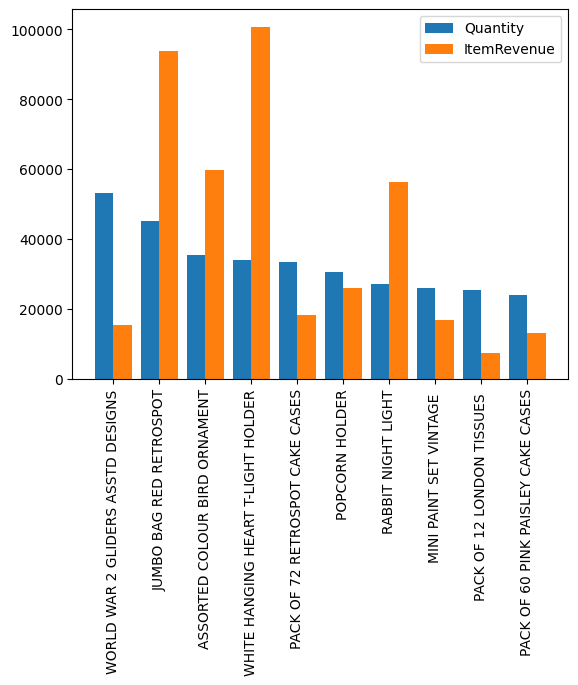

,Description,Quantity_x,UnitPrice
3798,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215,0.29
1767,JUMBO BAG RED RETROSPOT,45066,2.08
217,ASSORTED COLOUR BIRD ORNAMENT,35314,1.69
3709,WHITE HANGING HEART T-LIGHT HOLDER,34145,2.95
2274,PACK OF 72 RETROSPOT CAKE CASES,33385,0.55
...,...,...,...
3695,WHITE CHERRY LIGHTS,-8,6.75
2840,ROBIN CHRISTMAS CARD,-9,0.42
2531,PINK POODLE HANGING DECORATION,-12,0.38
245,ASSORTED TUTTI FRUTTI ROUND BOX,-24,1.65


In [183]:
Freq = dataset[["Description","Quantity","UnitPrice"]]
Freq["Description"]
print(done[:10])
w, x = 0.4, np.arange(10)

fig, ax = plt.subplots()
ax.bar(x - w/2, done["Quantity_x"][:10], width=w, label='Quantity')
ax.bar(x + w/2,done["Quantity_x"][:10]*done["UnitPrice"][:10], width=w, label='ItemRevenue')
ax.set_xticks(x)
ax.set_xticklabels(done["Description"][:10],rotation="vertical")
ax.legend()

print("Total profit of top 10 products")
plt.show()

done

Same graph without two highest products


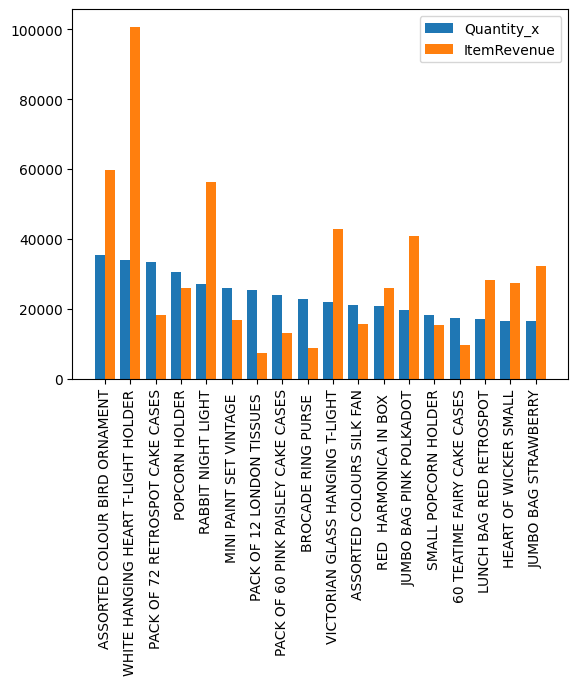

In [184]:
w, x = 0.4, np.arange(18)

fig, ax = plt.subplots()
ax.bar(x - w/2, done["Quantity_x"][2:20], width=w, label='Quantity_x')
ax.bar(x + w/2,done["Quantity_x"][2:20]*done["UnitPrice"][2:20], width=w, label='ItemRevenue')
ax.set_xticks(x)
ax.set_xticklabels(done["Description"][2:20],rotation="vertical")
ax.legend()

print("Same graph without two highest products")
plt.show()



In [185]:
pricesort = dataset[["Quantity","UnitPrice"]][dataset.Quantity>0].sort_values("UnitPrice",ascending=False)
#pricesort[pricesort.UnitPrice >0]

In [186]:
grouping = dataset[dataset.Quantity >0].copy()
#grouping

In [187]:
plotting = dataset[["Description","Quantity","UnitPrice","Country"]].assign(itemrevenue = dataset.Quantity*dataset.UnitPrice)
#plotting


In [188]:
expenditures = dataset.assign(countryspending = dataset.Quantity*dataset.UnitPrice)
allexpenditures = expenditures.groupby("Country").sum("countryspending").sort_values("countryspending",ascending=False)["countryspending"]
expenditures = expenditures.assign(InvoiceDate = (expenditures["InvoiceDate"]).dt.strftime('%Y-%m-%d'))



<Axes: title={'center': 'Total Spending by Country'}, xlabel='Country', ylabel='Total Spent'>

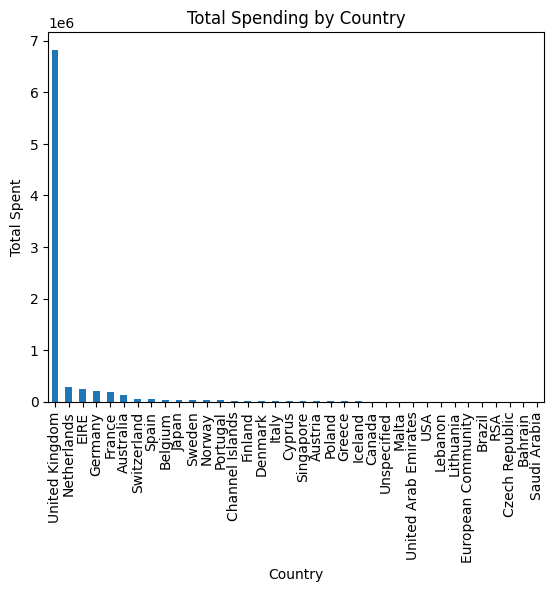

In [189]:
allexpenditures[:].plot(kind="bar",title="Total Spending by Country",ylabel="Total Spent")


Without the UK


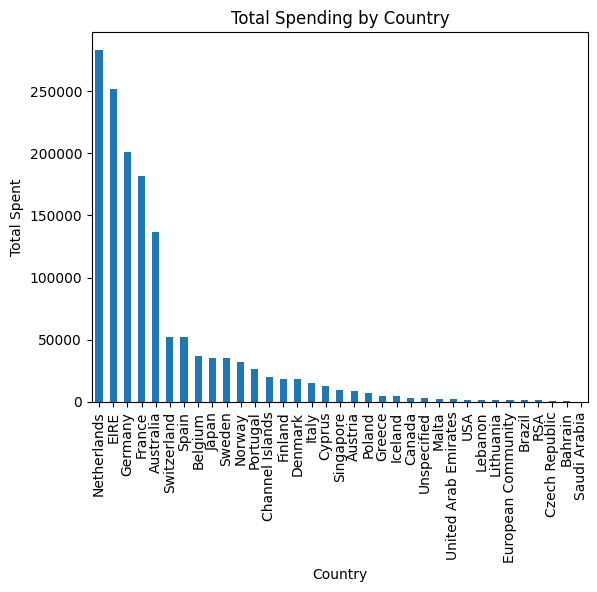

In [190]:
allexpenditures[1:].plot(kind="bar",title="Total Spending by Country",ylabel="Total Spent")
print("Without the UK")

<Axes: xlabel='Country'>

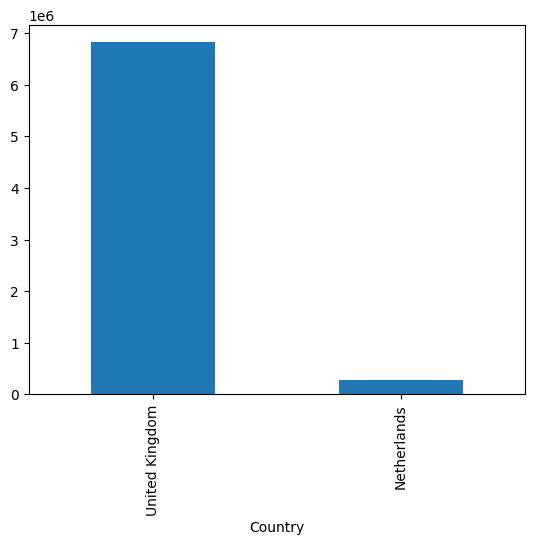

In [191]:
allexpenditures[0:2].plot(kind="bar")

<Axes: xlabel='InvoiceDate', ylabel='Total Orders'>

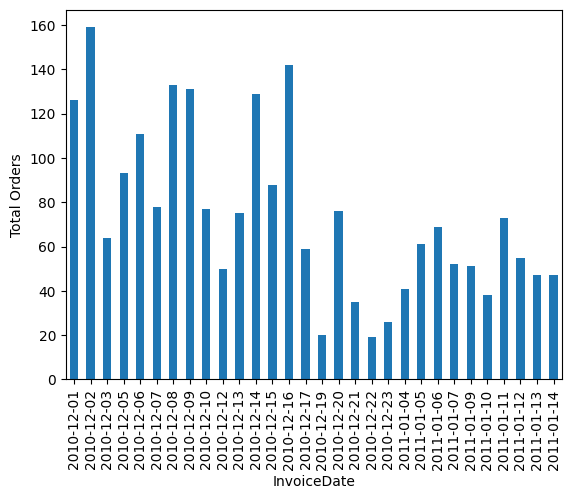

In [204]:
expenditures[expenditures.Description == "PAPER CRAFT , LITTLE BIRDIE"].sort_values("Country",ascending=False)


timelinetotalorders = expenditures.drop_duplicates("InvoiceNo")[["InvoiceDate","InvoiceNo"]].groupby(["InvoiceDate"]).count().sort_values("InvoiceDate",ascending=False)
#timelinetotalorders
timelinetotalorders = timelinetotalorders.sort_values("InvoiceDate",ascending=True)
timelinetotalorders[:30].plot(kind="bar", ylabel= "Total Orders",legend=False)


In [196]:
print("Other useful things to model are # of orders over the available dates and distribution of customers in each country")

Other useful things to model are # of orders over the available dates and distribution of customers in each country
